# Part II : Logistic Regression

# AI

"We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that we did not receive any external help, coaching or contributions during the production of this work."

Sabariis Venugopal Sankaranarayanan, 
Neil Jayesh Doshi

In [2]:
import pandas as pd
import numpy as np

In [3]:
Data = pd.read_csv("penguins.csv")
df = pd.DataFrame(Data)

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [1]:
df.describe()

NameError: name 'df' is not defined

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [4]:
new = df.dropna(axis=0,inplace=False)

In [7]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [8]:
new.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
new['body_mass_g'] = new['body_mass_g'] / 6300.0
new['bill_length_mm'] = new['bill_length_mm'] / 59.60
new['bill_depth_mm'] = new['bill_depth_mm'] / 21.50
new['flipper_length_mm'] = new['flipper_length_mm'] / 231.0
#new['year'] = new['year'] / 2009.0
df = new.copy()

C:\Users\spred\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\spred\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\spred\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [6]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.656040,0.869767,0.783550,0.595238,male,2007
1,Adelie,Torgersen,0.662752,0.809302,0.805195,0.603175,female,2007
2,Adelie,Torgersen,0.676174,0.837209,0.844156,0.515873,female,2007
4,Adelie,Torgersen,0.615772,0.897674,0.835498,0.547619,female,2007
5,Adelie,Torgersen,0.659396,0.958140,0.822511,0.579365,male,2007


In [7]:
df['species'] = pd.factorize(df['species'])[0]
df['island'] = pd.factorize(df['island'])[0]
df['sex'] = pd.factorize(df['sex'])[0]
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,0.656040,0.869767,0.783550,0.595238,0,2007
1,0,0,0.662752,0.809302,0.805195,0.603175,1,2007
2,0,0,0.676174,0.837209,0.844156,0.515873,1,2007
4,0,0,0.615772,0.897674,0.835498,0.547619,1,2007
5,0,0,0.659396,0.958140,0.822511,0.579365,0,2007
6,0,0,0.652685,0.827907,0.783550,0.575397,1,2007
7,0,0,0.657718,0.911628,0.844156,0.742063,0,2007
12,0,0,0.689597,0.818605,0.787879,0.507937,1,2007
13,0,0,0.647651,0.986047,0.826840,0.603175,0,2007
14,0,0,0.580537,0.981395,0.857143,0.698413,0,2007


In [43]:
y = df['sex']
x = df
x = x.drop('sex', axis=1)
x = x.drop('year', axis=1)
x = x.drop('species', axis=1)
x = x.drop('island', axis=1)


In [45]:
index = np.random.permutation(len(x))
split_size = int(0.8 * x.shape[0])
train = index[:split_size]
test = index[split_size:]
x_train, x_test = x.iloc[train], x.iloc[test]
y_train, y_test = y.iloc[train], y.iloc[test]

In [157]:
class LogisticRegression:
    def __init__(self, rate, itr):
        self.learning_rate = rate
        self.iterations = itr
        self.weights = []
        
    def sigmoid(self, x):
        part1 = 1 + np.exp(-x)
        sigma = 1 / part1
        return sigma
    
    def print_fcn(self, A):
        self.print_call(A)
    
    def print_call(self,A):
        print(A)
    
    def cost(self, x, y):
        N,n = x.shape
        part0 = np.dot(x, self.weights)
        h = self.sigmoid(part0)
        jw = 1/N * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
        return jw
    
    def gradient_decent(self, x, y):
        N,n = x.shape
        part1 = np.dot(x, self.weights)
        y_hat = self.sigmoid(part1)
        delta = y_hat - y_train
        dw = np.dot(x.T,delta)/N
        db = np.sum(delta)/N
        self.weights -= self.learning_rate * dw.T
            
    def predict(self, x, y):
        N,n = x.shape
        x_new = np.ones((N,n+1))
        x_new[0:N,1:n+1] = x
        x = x_new
        part1 = np.dot(x, self.weights)
        y_hat = self.sigmoid(part1)
        y_predicted = []
        for i in y_hat:
            if(i >= 0.5):
                y_predicted.append(1)
            else:
                y_predicted.append(0)
        return y_predicted
    
    def fit(self, x, y):
        N,n = x.shape
        x_new = np.ones((N,n+1))
        x_new[0:N,1:n+1] = x
        x = x_new
        N,n = x.shape
        self.weights = np.zeros(n)
        cost_list = []
        for i in range(self.iterations):
            self.gradient_decent(x, y)
            g = self.cost(x, y)
            cost_list.append(g)
        return cost_list
    
    def accuracy(self, x, y):
        y_predicted = self.predict(x,y)
        y_len = len(y_predicted)
        y =y.tolist()
        y_logical = np.zeros(y_len)
        for i in range(0,len(y_predicted)):
            if(y_predicted[i] == y[i]):
                y_logical[i] = 1
        acc = (np.mean(y_logical))*100
        print(self.weights)
        print(acc)

In [158]:
model1 = LogisticRegression(0.003,100000)
loss1 = model1.fit(x_train, y_train)
model.accuracy(x_test, y_test)

[ 3.75844262 -1.12279604 -2.05103759  1.47289617 -3.97075489]
71.64179104477611


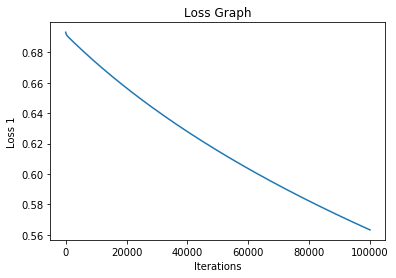

In [153]:
import matplotlib.pyplot as plt
plt.plot(loss1)
plt.xlabel("Iterations")
plt.ylabel("Loss 1")
plt.title("Loss Graph")
plt.show()

In [159]:
model2 = LogisticRegression(0.0003,150000)
loss2 = model2.fit(x_train, y_train)
model2.accuracy(x_test, y_test)

[ 0.64423258 -0.25593717 -0.22210862  0.18838287 -0.8110562 ]
64.17910447761194


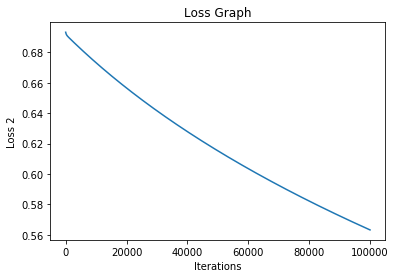

In [155]:
import matplotlib.pyplot as plt
plt.plot(loss2)
plt.xlabel("Iterations")
plt.ylabel("Loss 2")
plt.title("Loss Graph")
plt.show()

In [160]:
model3 = LogisticRegression(0.03,50000)
loss3 = model3.fit(x_train, y_train)
model3.accuracy(x_test, y_test)

[ 12.40226624  -2.76858902  -9.92302199   5.60420921 -11.04530462]
86.56716417910447


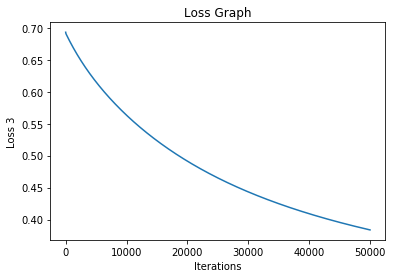

In [161]:
import matplotlib.pyplot as plt
plt.plot(loss3)
plt.xlabel("Iterations")
plt.ylabel("Loss 3")
plt.title("Loss Graph")
plt.show()